# Correlacion/Convolucion
## Cross-correlation (Correlacion cruzada)
Hemos visto algunos productos (multiplicaciones)

* Producto interno (producto punto)
* Product cruz ($\times$). En calculo, ver apendice de las notas.
* Producto tensorial (externo)
* producto matricial.
* producto Hadamard (Schur o punto-a-punto).

El producto interno es una medida de "similaridad" que explotamos en esta clase. Veamos una forma del producto interno (punto) . Asumamos dos vectores $x,y \in \mathbb{R}^n$, entonces
$x=(x_1, x_2, \cdots, x_n)^T$,
$y=(y_1, y_2, \cdots, y_n)^T$

$$x \cdot y =  \sum_{j=1}^n x_j y_j = \| x \| \| y \| \cos \theta $$

Como es que el producto punto mide similardiad. Tradicionalmente comparamos dos vectors $x,y$ con la norma do como

$$ \| x - y \| = \sqrt{\sum_i (x_i - y)^2} $$
Pero esto no siempre es deseable. Incluso en LLM (Large Language Models) el producto interno es muy importante.

Veamos un ejemplo donde el producto interno es superior para estimar cuando dos vectores tienen similaridades.

$$
x =  \begin{pmatrix} 1 \\ -10 \\ 5 \end{pmatrix}   \quad , \quad
y =  \begin{pmatrix} 10 \\ -100 \\ 50 \end{pmatrix}  
$$
Es claro que $y = 10 x$, pero si medimos la diferencia con la norma 2 $\ell_2$

$$ \| x - y \|= \sqrt{9^2+ 90^2 + 45^2} =  101.02$$
Es una diferencia grande comparada con los valores que vemos en los vectores.

Usemos ahora el coseno como una medida de similaridad.

$$\cos \theta = \frac{x \cdot y }{ \| x \| \| y \|} = 1 $$

El coseno mide la **similaridad** de las **fases** (el angulo).
Si $\theta=0$ son similares, si $\theta=\pi/2$ hay ortogonalidad lo que indica que $x,y$ no tienen ninguna correlacion, si
$\theta=\pi$ hay **anti-similaridad**. Son similares pero con signo contrario.

La fase es mas importante que la amplitud. Si tiene una una suma de vectores, la suma es grande si ellos estan en la misma direccion pero si las direcciones son aleatorias o en el peor de los casos contrarias, la suma es pequenha.

Nos importa comparar objetos (vectores) que tengan direcciones parecidas y el tamanho no importa tanto. Recuerden en ML, normalizabamos los   vectores.
Igual no nos vamos a preocupar mucho por el tamnho y vamos a pensar en la operacion
$$ x \cdot y $$
como una medida de similaridad (se usa en "attention" de LLM).

En procesamiento de senhales y de imagenes (incluye el ML en imagenes, deep learning) es muy importante descurbir patrones. A todo esto le agregamos una palabra que es **desplazamiento** (shift). Tenemos dos senhales
$f_1(\theta) = a_1 \sin \theta$.
$f_2(\theta) = a_2 \sin \theta$.
Estas dos senhales son basicamente la misma asi $a_1 \ne a_2$, pues picos van picos y valles van con valles.
Vamos a ignorar la amplitud. Pensemos en una senhal como

$$f(t) = a_1 \cos(t + \phi) $$
Y queremos usar un "filtro" de forma parecida para identificar el desplazamiento que es $\phi$.
El "filtro" es de la forma $g(t) = a_2 \cos t$

Como con este filtro $g(t)$ podemos hallar $\phi$ (el desplazamiento, o el desface).


La forma es usar el producto interno pero desplazando el filtro  a travez de la senhal $f(t)$. Esto se puede escribir matematicamente (en el continuo)

$$ \langle f(t), g(t + \tau) \rangle = \int_D f(t) g(t + \tau) d \tau \tag{1} $$

Esta ecuacion se denomia **correlacion**. Vemos que esta correlacion es funcion de $\tau$, por que $t$ es variable muda.
Podemos entonces escribir

$$ h(\tau) = \int_D f(t) g(t + \tau) d \tau \tag{2} $$

Veamos un ejemplo, con $g(t) = \cos t$
y queremos encontrar el "shift" (desplazamiendo) de nuestros "datos" $f(t) = \cos (t + \phi)$.

Visitamos la  ecuacion (2) y escribamos

$$h(\tau) = f(t) * g(t) = \int_0^{2 \pi} f(t) g(t + \tau) dt = \int_D \cos(t + \phi) \cos(t + \tau) dt  $$
Pensemos en el dominio $[0, 2 \pi]$, y que $\phi=\pi$.

Al evaluar esta integral
usando

$$\cos \alpha \cos \beta = \frac{\cos(\alpha + \beta) + \cos(\alpha - \beta)}{2} $$

Calculando la integral

$$h(\tau) = \pi \cos ( \tau - \phi) $$
Claramente el "shift" que me hace coincidir las dos senhales (el filtro con la senhal ) es $\tau=\phi$. En este caso como $\phi=\pi$, este es el desplazamiento para hacer coincidir las senhales.











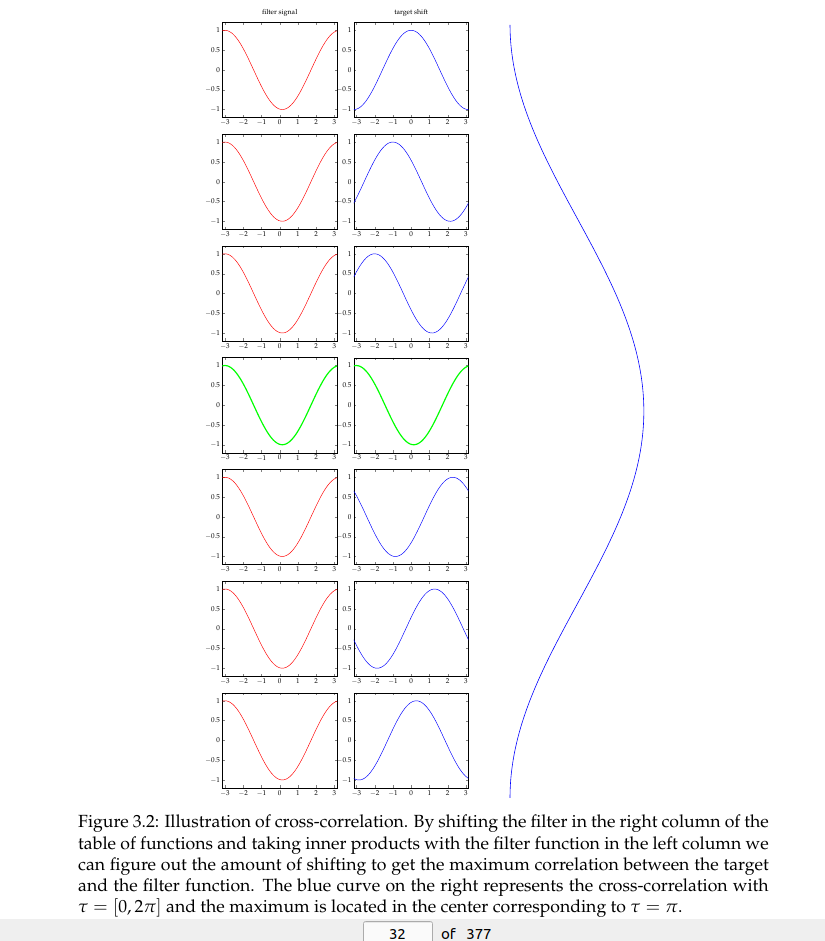

La correlacion es una funcion que compara, usando el producto interno, dos senhales (conjuntos de datos, un filtro con unos datos, dos vectores). Esta funcion (correlacion) es funcion del desplazamiento de uno de ellos y el consecuente producto interno de este desplazado por el otro (filtro).


Definamos correlacion para espacios finito dimensionales

$$ z_j = (x * y)_j =\sum_{i} y_i x_{i+j}  \tag{3} $$
donde $x \in \mathbb{R}^n, y \in \mathbb{R}^m$
Se desplazan los datos $x$ y usamos la superposicion con el filtro $y$.

Si vamos a programar tenemos que saber donde esta $i$ y $j$.
Asumamos que el numero de puntos de los datos es $N_x$ y el numero de puntos del filtro $N_y$. Entonces

$$0 \le i < N_y $$
Entonces donde esta $i+j$

$$ 0 < i+j < N_x $$
De forma que podemos escribir mas exactamente la formula

$$ z_j = (x * y)_j =\sum_{i=0}^{N_y-1} y_i x_{i+j}  
\quad , \quad j = 0, 1, \cdots, N_x - N_y\tag{4} $$

Veamos ejemplos graficos.




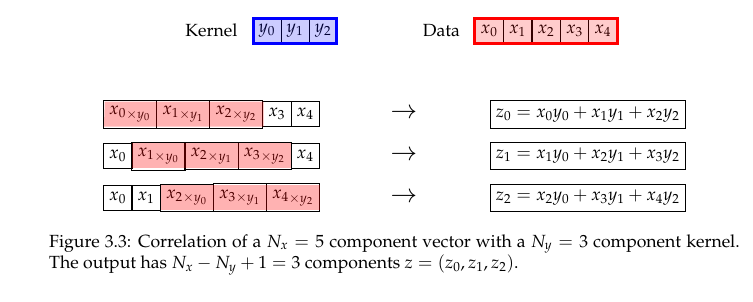

En el ejemplo de la Figura 3.3, tenemos que $N_x=5$, $N_y=3$ y que la salida es $N_z=N_x-N_y+1=5-3+1=3$.

Tenemos que el numero de elementos de la salida es

$$N_x - N_y + 1 $$

Pregunta: Y si quiero que la salida tenga el mismo numero de datos que la entrada (o mas). Se necesita agregar (padding) elmentos al final de los datos. Generalmente estos elementos que se agreagan son 0.

Para que la salida tenga exactamente el mismo numero de elementos de la entrada el "padding" debe ser

$$p = (N_y -1)/2 $$
pues el padding se hace a ambos lados (al principio y al final, o arriba y abajo)

Veamos por que:
El numero de elementos nuevos de los datos es $N_x + 2p$
De forma que ahora el tamanho de  la salida esta dada por

$$N_x + 2p - N_y + 1 = N_x -N_y + N_y - 1 + 1 = N_x $$
A este tipo de padding se llama **half padding** o **same padding**

Si $N_y$ es impar esta bien, pero que pasa si $N_y$ es par?
Si es par no se recobran exactamente el mismo numero pero casi.

Asumamos que $N_x=8$, entonces tomamos la parte entera

$$ [(N_x -1)/2] = [7/2]=3 $$
Hacemos el conteo del tamano de la salida

$$ N_x - N_y + 1 + 2[ (N_y-1)/2] = N_x - 8 + 1 + 6=N_x-1 $$

Veamos una grafica con padding



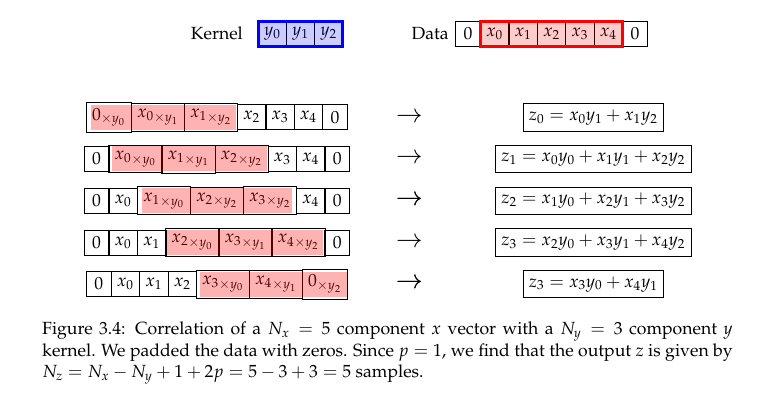

### Concepto de **stride** (paso, salto, brinco)
Con el fin de ahorrar en proceso y memoria podemos definir una correlacion con "saltos". Veamos

$$z_j = x_i * y_i = \sum_{i=0}^{N_i-1} y_i x_{i+j}
\quad , \quad j=0, s, 2s, \cdots, ks \quad, ks \le N_x - N_y$$

La salida llega a brincos En vez de $0,1$ es $0,s$ donde $s>1$, y $s$ es entero.
Hay ganancia en numero operaciones y memoria de salida.


$$\#(z_j)  = \frac{N_x - N_y + 2p}{s} + 1 $$

Veamos un ejemplo con padding y striding.

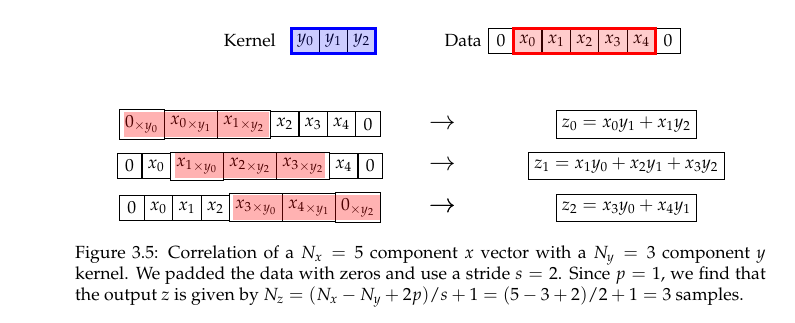

## Correlacion en dimensiones multiples
### Dos dimensiones

* Caso continuo
$$h(\tau, \rho) = \int_{D_\tau} \int_{D_\rho} f(t,r) g(t + \tau, r + \rho) dt dr $$


* Caso discreto

$$z_{jk} = ( x * y)_{jk} = \sum_m \sum_n y_{mn} x_{m+j \; n+k} $$

Asi como hicimos en una dimension tenemos las longitudes de datos

$$\text{datos} \to (M_x, N_x)  \quad , \quad \text{filtro} \to (M_y, N_y)$$
Para evitar "overflow*
Como hicimos antes $i+j < M_x$, $n+k < N_x$.
entonces escribimos

$$z_{jk} = ( x * y)_{jk} = \sum_{m=0}^{M_y-1} \sum_{n=0}^{N_y-1} y_{mn} x_{m+j \; n+k} \quad , \quad j=0,1, \cdots, M_x - M_y \quad , \quad k=0,1, \cdots, N_x - N_y$$


El tamanho de la salida es

$$\#(z_{ij}) = (M_x - M_y +1) \times (N_x - N_y + 1). $$
Con padding

$$\#(z_{ij}) = (M_x - M_y + 2 p_M + 1) \times (N_x - N_y + 2 p_N +1). $$

Si queremos que el padding sea **same** entonces debemos usar

$$
p_M = \frac{M_x -1}{2}  \quad , \quad  
p_N = \frac{N_x -1}{2}  $$


Veamos un ejemplo grafico.


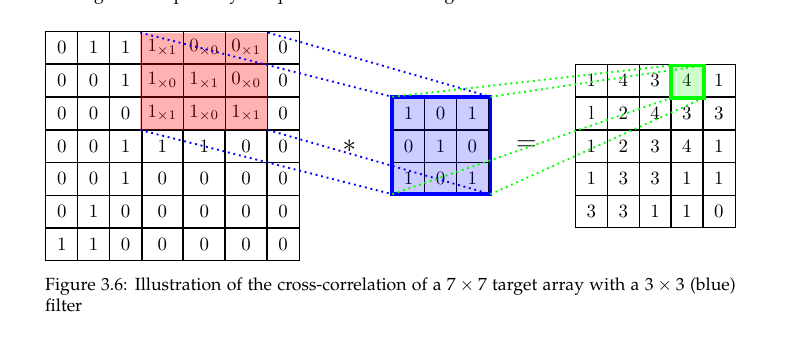

7:50

En este ejemplo vemos que el filtro es

$$\begin{pmatrix}  1 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 1 \end{pmatrix}  $$
La lngitud (tamanho) de la salida es

$$(M_x - M_y+1) \times (N_x - N_y + 1) = (7 -3 + 1) \times (7 - 3 +1) = 5 \times 5. $$

A estos filtros (correlacion cruzada) tambien se les puede agregar padding y striding.

Dejamos al estudiante formular el problema con padding y strading.


Si se tiene un conjuntto de imagenes, estas forman un cubo con $N_x \times N_y \times N_z$ donde $N_x$ el numero de pixeles en la horizontal, $N_y$ es el numero de pixeles en la vertical, $N_z$ el numero de imagenes.
(en el finito esto produce tensores de rango 3).

Como pensar en un tensor de rango 4. Piense en peliculas

* Inidice de la pelicula $i$
* Indice del marco $j$
* Indice de la coordenada $x$
* Indice de la coordenada $y$

Extendamos el concepto de correlacion a tres dimensiones


* Caso continuo
$$h(\tau, \rho, \zeta) = \int_{D_\tau} \int_{D_\rho}  \int_{D_\zeta} f(t,r,s) g(t + \tau, r + \rho, s + \zeta) dt dr $$


* Caso discreto

\begin{eqnarray}
z_{jkl} = ( x * y)_{jkl} &=& \sum_{m=0}^{M_y-1} \sum_{n=0}^{N_y-1} \sum_{o=0}^{O_y-1} y_{mno} x_{m+j \; n+k \; o + l}  \\
j &=& 0, 1, \cdots, M_x - M_y \\
k &=& 0, 1, \cdots, N_x - N_y \\
l &=& 0, 1, \cdots, O_x - O_y
\end{eqnarray}

A esto tambien se le puede agreagar padding $p_x,p_y,p_z$ y striding $s_x, s_y, s_z$. Lo dejamos ahi.

Piense en otro ejemplo mas simple. Una imagen a la vez, piense
en tres dimensiones
* pixeles en $x$
* pixeles en $y$
* canales: RGB (Reed Green Blue)

El ejemplo se muestra a continuacion.
Tiene padding de $p=1$.

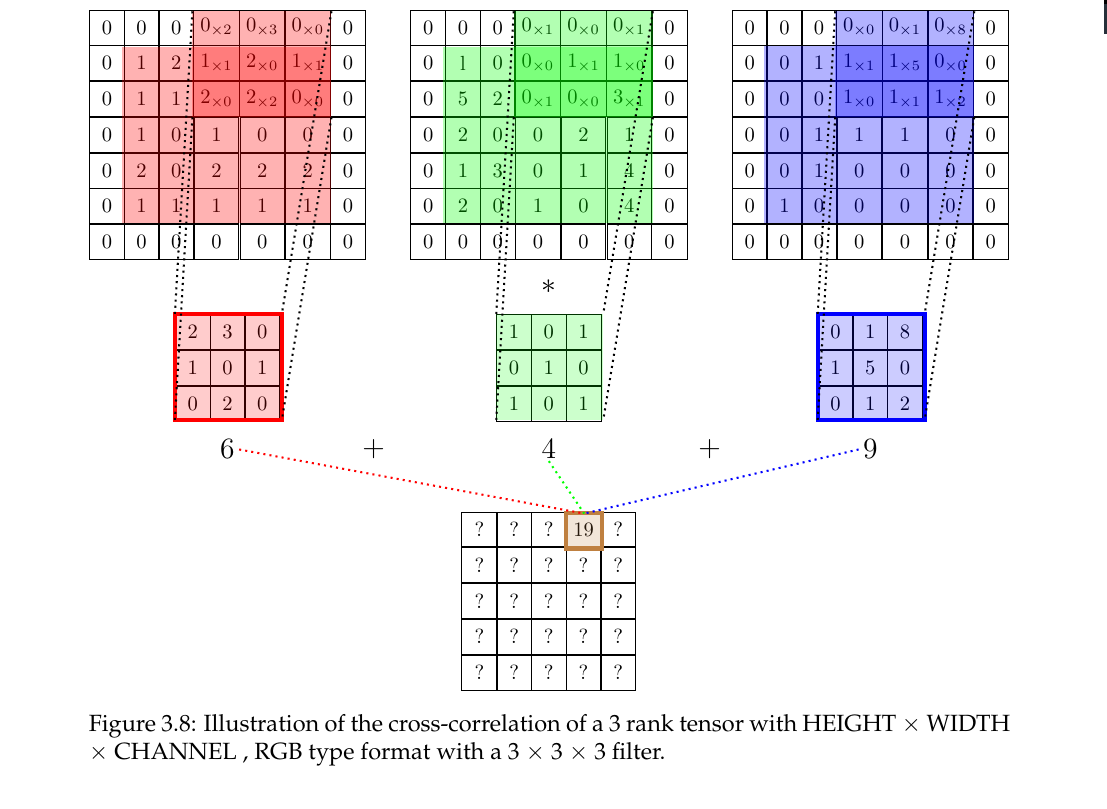

El filtro (3 filtros, uno por cada color) es un tensor de rango 3

$$ \begin{pmatrix}
\begin{pmatrix}
2 & 3 & 0 \\ 1 & 0 & 1 \\ 0 & 2 & 0
\end{pmatrix} \quad
\begin{pmatrix}
1 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 1
\end{pmatrix} \quad
\begin{pmatrix}
0 & 0 & 8 \\ 1 & 5 & 0 \\ 0 & 1 & 2
\end{pmatrix}
\end{pmatrix}  $$

Hablemos de las dimensiones:

El arreglo (tensor) de entrada es $5 \times 5 \times 3$
El filtro tiene dimensiones  (np.shape()) $3 \times 3 \times 3$

Con padding $p=1$, $2p=2$ la salida es

$$(5 -3 + 2 + 1) \times (5 -3 + 2 + 1) \times (3 - 3 + 1) = (5 \times 5 \times 1  $$

Pongamos **Strides**:

$$z_{jkl} = (x * y)_{jkl} = \sum_{m=0}^{M_y-1} \sum_{n=0}^{N_y -1} \sum_{o=0}^{O_y -1} x_{mno} y_{m+j \, n+k \, o + l } $$

Con

$$j = 0, s_x, 2 s_x, \cdots, \le M_x - M_y $$
$$k = 0, s_y, 2 s_y, \cdots, \le N_x - N_y $$
$$l = 0, s_z, 2 s_z, \cdots, \le O_x - O_y $$

Tamanho de la salida
Digamos que los datos tienen dimensiones $nx,ny,nz$
que el filtro (kernel) $kx,ky,kz$, el padding es $p_x, p_y,p_z$ y el strading $s_x, s_y, s_z$, entonces

$$\text{output size} = [ (nx-kx + 2 px)/sx + 1 ] \times [ (ny-ky + 2 py)/s_y + 1 ] \times [nz -kz + 2 p_z)/s_z + 1 $$

En resumen:
La correlacion cruzada (cross-correlation, correlation) extrae
patrones espaciales. Por esta razon se usa en las CNN: Convolutional Neural Networks donde toma el nombre de "convolucion". En pocas clases estudiaremos las CNN.



Mas ejemplos de correlacion en 2D.
No padding/ No striding

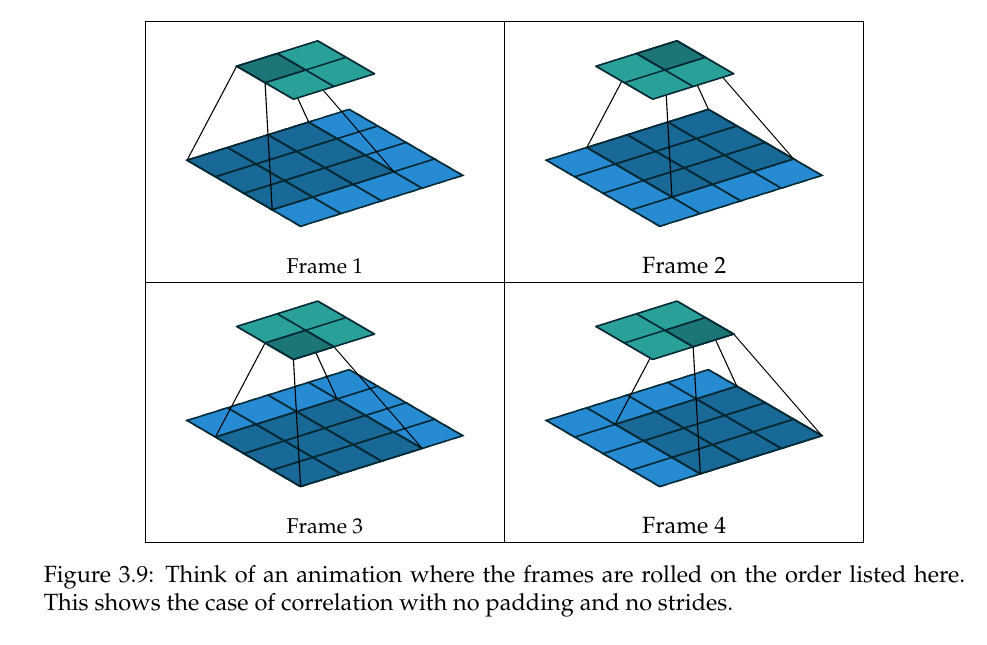

Los datos tienen dimensiones $(N_x, M_x)=(4, 4)$.
El filtro tiene dimensiones $(N_y, M_n)=(3,3)$
La salida tiene dimensiones
$$(N_z, M_z) = (N_x-N_y+1, M_x - M_y + 1) =(2,2) $$

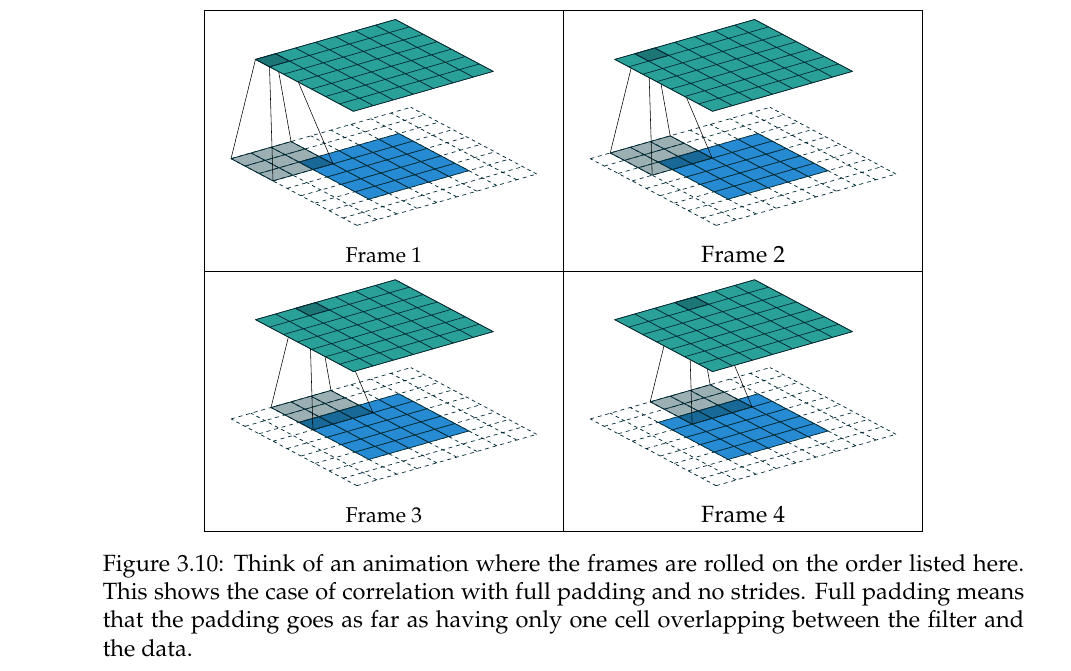

**Full padding**: Cuando al comenzar el proceso, solo existe una celda superpuesta (one overlapping cell)
**Half padding**: Cuando la longitud ("np.shape()") de la entrada es igual al tamanho ("np.shape())" de la salida. Tambien se le dice **same**.

Analisis dimensional:
* Los datos de entrada son $(nx, ny) = (5,5)$
* El filtro $(k_x, k_y) = (3,3)$
* Padding $p_x=p_y=2$
* Strading $s_x=s_y=1$.

El tamanho de la salida es:

$$\text{output size } =
\left [  \frac{nx-kx+2px}{sx} + 1  \right ] \times \left [
  \frac{ny-ky+ 2py}{sy}  \right ] =  7 \times 7. $$

### Ultimo ejemplo grafico sin analisis dimensional.
Tiene padding y Strading.



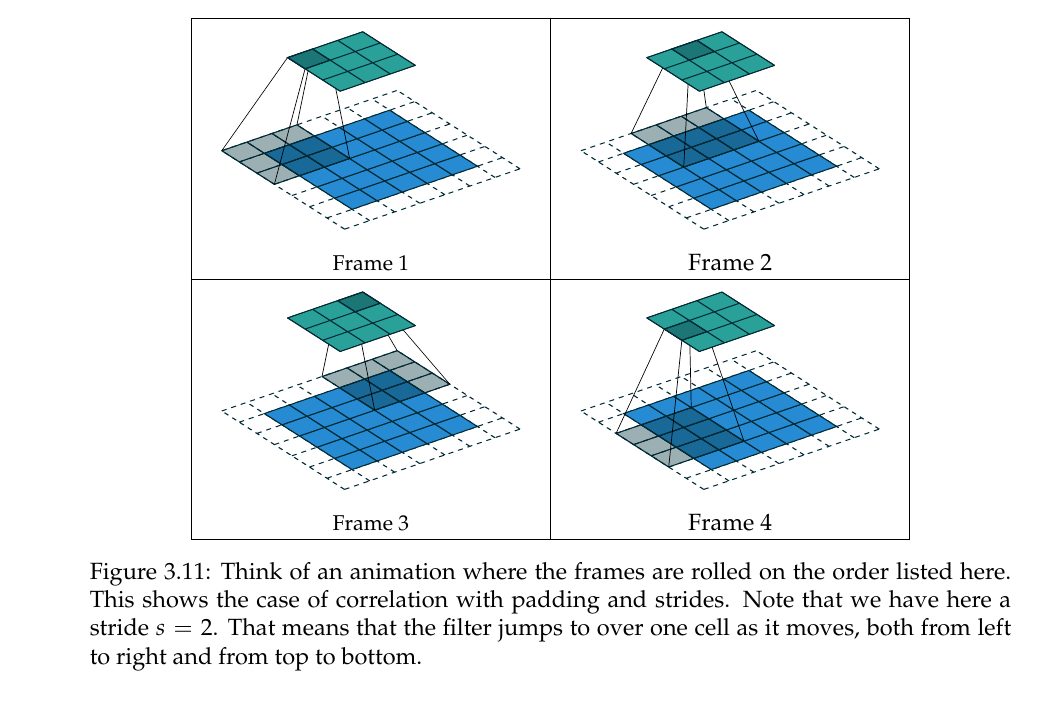

## Convolucion.
Yo describo la convolucion en las notas de clase pero no profundizamos sobre esto por que no se usa en redes neuronales.
Ademas hay cosas mas importantes en DL que aprender, de pronto noes queda al final un tiempito para estudar LLMs.

Haciendo el analisis de senhales que son LTI (Lineales e invariantes con el tiempo) encontramos el filtro llamado **convolucion**.

* **continuo**:
en una dimension
$$h(\tau) = \int_{-\infty}^\infty f(t) g(t-\tau) $$

* **discreto**:
en una dimension
$$ z_j = (x \star y) = \sum_{i=0}^{N_x-1} y_i x_{j-i}$$

Igual se puede extender con padding/strading, para cualquier numero de dimensiones.

La idea es que convolucionar con un arreglo $x_i$ es correlacionar con el arreglo $x_{-i}$.

Si es de dos dimensiones entonces el arregllo

$ x_{ij}$ debe ser visto como
$ x_{-i -j}$

Un ejemplo grafico. Si queremos convolucionar con el gato de la figura, lo podemos hacer calculando la correlacion con el gado "flipped" de izquiera a derecha y de arriba abajo.




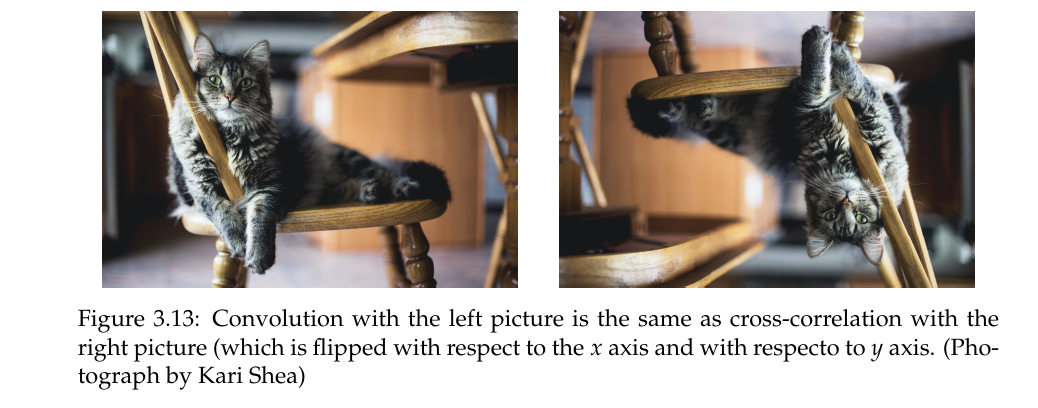

La convolucion se usa para procesamiento de senhales y otros campos como la estadistica. Se puede probar matematicamente que la probabilidad de la suma de dos distribuciones, es la convolucion de las probabilidades.

[Ver este sitio](https://en.wikipedia.org/wiki/Convolution_of_probability_distributions#:~:text=The%20probability%20distribution%20of%20the,convolution%20of%20their%20individual%20distributions.).

Ojooooooooooooooooooooo: De este momento en adelante, lo que llamamos correlacion se va a llamar convolucion.



# Proxima clase: Upscaling (reescalado)

* Vecino mas cercano (nearest neighboar)
* Bilinear
* Transpose convolution
